# Solving Problems with Numerical Methods

The majority of courses in algebra, calculus, physics, chemistry, and engineering present us with problems that are difficult to formulate but straightforward to solve.  What I mean by that is we may struggle to develop the model equation that describes our system, but once we have that equation, it is usually easy for us to solve. Often, we are even able to solve that equation *analytically*. What do I mean by solving a problem analytically?  This is when I am able to use methods from algebra, trigonometry, calculus, etc. to "solve for x", i.e., to obtain a closed form solution that explicitly states the value of my variable of interest. Some examples to clarify that point:

$$0 = x^2 - 25$$

Can be solved by factoring or by simply moving 25 to the left hand side of the equation and taking the square root, giving:

$$x = 5 \ \textrm{or} \ x = -5$$
    
If not that, we could use a quadratic equation to get an explicit solution for x.

Another example from calculus:  Let's say I want to compute the area under the curve given by $y = 3x^3$ from x = 0 to x = 10.  It is straightforward to evaluate that definite integral:

$$Area = \int_0^{10}(3 x^3 dx) = \frac{3}{4} \cdot x^4 \big|_0^{10}$$

Which is evaluated as:

$$Area = \left(\frac{3}{4} \cdot 10^4\right) - \left(\frac{3}{4} \cdot 0^4\right) = 7500$$

Most of us are comfortable with these types of analytical solutions because it is what we've been trained to do. As we begin to deal with more advanced topics, we often need to solve problems where it may be tedious, difficult, or even impossible to find an analytical solution. This is where numerical methods come in.  Generally speaking, numerical methods are algorithms that employ simple operations (addition, subtraction, multiplication, and division) to provide approximate solutions to problems that do not have tractable analytical solutions. The basic operations at the core of numerical methods (again, generally simple addition, subtraction, multiplication, and division) are repeated iteratively, often many, many times, until we obtain a solution that is within our precision tolerance for a particular problem.

**The iterative nature of numerical methods makes them very tedious on paper but extremely efficient in most programming languages.**

When we first encounter numerical methods, many of us are uncomfortable with them because they look so different from the analytical solutions that have been ingrained in our minds as the way we will solve problems.  But fear not!  They are actually really simple.  We will see what is under the hood with numerical methods for a couple of test problems to get a feel for how they work, and then we'll introduce some packages available in Python that handle numerical solutions for us in a very efficient and robust way.

Exercises on numerical methods will cover 3 broad classes of problems:

1. Root finding 
2. Optimization (finding minima and maxima)
3. Solving differential equations (initial value problems)

To build confidence, we'll do this in the way I always advocate when picking up a new problem solving technique: we will test it out on a problem that we already know how to solve to make sure we get the correct answer, and then we'll apply the methods to increasingly complex problems.

A final note about why you should embrace numerical methods:  Once you *get* them, they are really easy - often times they are *much* easier than developing an analytical solution.  You can write a code to handle them, and then reuse that code over and over and over by adapting it to suit the problem at hand.  They will greatly expand your ability to solve problems, and I guarantee that you will be able to use them in the rest of your engineering curricula.  You'll even get style points for doing it in Python.

## Root Finding ##

Let's start with the most straightforward case first - using numerical methods to find the root of a function. Again, all we mean by root finding is finding the value of the function argument(s) where the function is equal to zero.  

### Univariate Functions ###

We will start with the case of root finding with a *univariate functions*, which is a highfalutin (but concise!) way to say *a function that only has one independent variable*. For example, 

$$y(x) = x^2 + exp(x) - 7x + 5$$

is only a function of x.  Once I specify a value of x, I can evaluate the corresponding value of y.  y is thus a univariate function of x. We actually introduced a test univariate function in Assignment 5 (While Loops), and we used a simple numerical method to solve it, so let's pick up that example, use it again here, and expand our toolkit.

**The basic problem**

We have a *univariate* function, 

$$y = 5x^2 + 8x - 23$$ 

We would like to find the **roots** for that function. By that, I mean the values of x where y = 0. So, when we discuss "root finding" for this equation, we are simply solving the equation below for x:

$$0 = 5x^2 + 8x - 23$$

This is an important thing to remember as we move forward. The equations that we see and develop in our models will take many different forms, but when we write programs that use numerical methods to solve them, for a univariate function, we will always be solving 0 = f(x), and so we will have to write our code accordingly.

**The Utility of Graphing your Functions**

Anytime I can do so (and I can typically do so with univariate functions), I will graph the function of interest on various domains (ranges of x values) so that I can see where roots might be located. As we consider the use of numerical methods, we will see how important it is to provide good initial guesses for the root or a reasonable range of x-values where we think we are likely to find the root. So if it is possible, start by graphing the function of interest.

We haven't talked much about graphing functions. It seems straightforward until you go to do it in base Python, and then you might scratch your head a bit as to how you'd actually use a function to generate a large set of y values from a large set of x values. So let's cover a bit of syntax using lists (which we are familiar with), and then cover some of the utility of numpy arrays in these types of operations. First, let's import pyplot:

    import matplotlib.pyplot as plt

Next, let's define the function of interest in the form of 0 = f(x)

    def y(x):
        return 5*x**2 + 8*x - 23
 
I can use that function to calculate the value of y for any value of x. Up until now, we've mostly worked with lists, so if I wanted to prepare a set of x values and their corresponding y values using this function, i would probably do so with a pair of list comprehensions or for loops, whichever you prefer:

    xplot_list = [i for i in range(-4,4)]
    yplot_list = [y(x)  for x in xplot_list]

Now I have my set of (x,y) pairs in two separate lists. I can plot them using:

    plt.plot(xplot_list,yplot_list)
    plt.plot([-4, 3], [0, 0],'k', Linewidth = 1) #Adding an x-axis reference line to help visualize roots

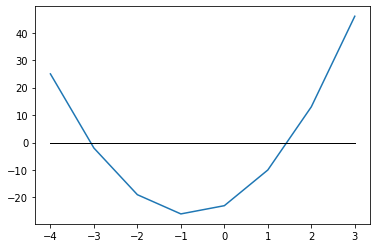

In [6]:
import matplotlib.pyplot as plt
def y(x):
    return 5*x**2 + 8*x - 23
xplot_list = [i for i in range(-4,4)]
yplot_list = [y(x) for x in xplot_list]

plt.plot(xplot_list,yplot_list)
plt.plot([-4,3], [0,0],'k', Linewidth = 1)

I can see from that graph that there are two roots (which is the most we can have for a quadratic).  There is one between -4 and -3, and there is another between 1 and 2.

Now that we've used a function for graphing collections that are structured as lists, let's get acquainted with some of the neat features of numpy's ndarray. They are great in that they support element-wise operations (wheras a list does not - I have to use a list comprehension to do element-wise operations on a list). 

For an illustration of element-wise operations, let's create the exact same set of x-values using a numpy method called linspace, which creates a set of evenly spaced floating point numbers on the interval specified.

    import numpy as np
    xplot_ndarray = np.linspace(-4,3,8)

Now compare the outputs you get when you perform the following operations.
    
    print(xplot_ndarray, xplot_list, sep = '\n\n') #print collections separated by two new lines; they are identical
    print(xplot_ndarray*3, xplot_list*3, sep = '\n\n') #print 3*each collection; they are not identical.

In [7]:
import numpy as np
xplot_ndarray = np.linspace(-4,3,8)

print(xplot_ndarray, xplot_list, sep = '\n\n')
print(xplot_ndarray*3, xplot_list*3, sep = '\n\n')

[-4. -3. -2. -1.  0.  1.  2.  3.]

[-4, -3, -2, -1, 0, 1, 2, 3]
[-12.  -9.  -6.  -3.   0.   3.   6.   9.]

[-4, -3, -2, -1, 0, 1, 2, 3, -4, -3, -2, -1, 0, 1, 2, 3, -4, -3, -2, -1, 0, 1, 2, 3]


So what you see is that I multiply each element in the numpy array by 3, whereas with the list, I concatenate the list with itself 3 times.  Big difference!  This is why we had to use a list comprehension to generate the set of y values for plotting in the first cell.

This is an example of direct, element-wise operation on a collection, and it is is very powerful! By default, numpy arrays will have element-wise operations for addition, subtraction, multiplication (including raising to a power), and division. This means that I can easily pass a numpy array as an argument to a function and have that function operate element-by-element on the array. If I was using lists, as we saw above, we would write a for loop or a list comprehension to do this, whereas with a numpy array, we can pass it directly as a function argument. 

Using numpy arrays with our function y to generate and x,y pairs:

    yplot_ndarray = y(xplot_ndarray)
    plt.plot(xplot_ndarray, yplot_ndarray)
    
Alternatively, if it is convenient, you can pass the array directly to the function as an argument in plot!

    plt.plot(xplot_ndarray, y(xplot_ndarray))
    
They are equivalent.

This behavior of numpy arrays is a lot like what you see in Matlab where vectors and matrices both handle element-wise operations well. Indeed, even the syntax (linspace) is the same as Matlab. In many ways, numpy *feels* like a Matlab extension for Python. 

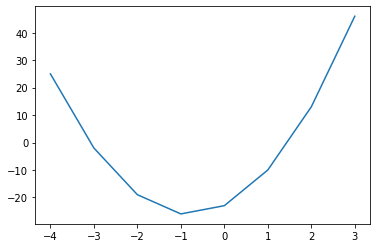

In [8]:
yplot_ndarray = y(xplot_ndarray)
plt.plot(xplot_ndarray, yplot_ndarray)

We know from Assignment 5 (or just recalling our math background) that we can solve this problem exactly using the quadratic equation:

$$x = \frac{-8 \pm \sqrt{8^2 - 4\cdot5\cdot-23}}{2\cdot5}$$

Solving this, we find:

$$x = 1.489 \ \ \textrm{or} \ \ x = -3.089$$

This is absolutely consistent with our graphical analysis, as it should be! For me, this is a hugely important step when learning a new method:  we are establishing the correct answer using a method we are comfortable with *before* we start writing code to implement a method that is unfamiliar too us.

**A very crude numerical method**

You probably also recall that we wrote a while loop to solve this problem:

    x = 0.0    
    y = -23.0  
    while abs(y) > 0.1:       
        y = 5*x**2 + 8*x - 23 
        print(round(x,2),round(y,2))            
        x += 0.01
    print(round(x,2),round(y,2))
        
We have essentially written a code to automate an uninformed guess-and-check iteration. At its core, you'll see there is no complex mathematical analysis: we guess a value for x, and we use simple operations to calculate the resulting value of y. We continue changing our value of x until we are close enough to y = 0 that we are satisfied with the solution. This is a very basic numerical method!

I don't advocate you use this one - it is crude in terms of tolerance, slow to converge, and rather unstable.  We really just used it to illustrate the function of a while loop. There are far better strategies for root finding. For example:

**Newton-Raphson Method**

A common entry point to numerical root finding is the Newton-Raphson Method. As with most numerical analysis, this is an iterative method, but it uses information about the function value and the derivative value to make more informed iterations. The general "formula" for the Newton-Raphson iteration is:

$$x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}$$

In other words, you make a guess for x ($x_i$), you evaluate the function at that value of x, $f(x_i)$, and you evaluate the derivative of the function at that value of x, $f^\prime(x_i)$  You subract the function value divided by its derivative value from the current value of x, and that gives you the updated value of x. You proceed with this iteration until your function value is sufficiently close to zero that you are satisfied with the solution, i.e., you are within your precision tolerance. This algorithm is *much* more efficient than the simple guess and check method we used above.  We can write a Newton-Raphson iteration to solve our example problem. Because this is a far faster and more robust method, I will set a much tighter tolerance. You will notice that it takes far fewer iterations, and it converges to much closer to the value to the true root(s).  

    x = 0.0
    y = -23.0
    while abs(y) > 1e-8:
        y  = 5*x**2 + 8*x - 23
        dy = 10*x + 8
        x  = x - y/dy
        print(round(x,10),round(y,10))

In [9]:
x = 0.0
y = -23.0
while abs(y) > 1e-8:
    y  = 5*x**2 + 8*x - 23
    dy = 10*x + 8
    x  = x - y/dy
    print(round(x,10),round(y,10))

2.875 -23.0
1.7504251701 41.328125
1.5024922836 6.3233427406
1.4891435492 0.3073535809
1.4891046288 0.0008909436
1.4891046285 7.6e-09


Wow! I first learned the Newton-Raphson method in about 1999, where I had to write out several iterations by hand on green graph paper and solve it with a TI-89. After all these years, it still blows my mind how well it works.

A couple of things you should get used to: First, this method will return a single root.  The one that it finds is largely determiend by my initial guess. If you know there are multiple roots, you can usually locate them by making different initial guesses in the range where you know the root to be - this is why a graphical analysis is useful. Second, in the above example, I wrote out the expressions for y and the derivative of y inside the body of the while loop, but I could just as easily define them as external functions.  This will be really handy in that we can test many methods on a single function (which we will do plenty of later in this exercise).

     def y(x):
         return 5*x**2 + 8*x - 23
     def dy(x):
         return 10*x + 8
     
     x = 1
     while abs(y(x)) > 1e-8:
         x = x - y(x)/dy(x)
     print(round(x,10))
     
You should get used to that interchangability and how you can use an externally defined function over and over again throughout your code.

In [16]:
def y(x):
    return 5*x**2 + 8*x - 23
def dy(x):
    return 10*x + 8

x = 1
while abs(y(x)) > 1e-8:
    x = x - y(x)/dy(x)
print(round(x,10))

1.4891046285


Finally, for a cool visualization of how iterative root finding algorithms proceed, run this code: It will give you a graphical output of the initial guess and the updated root location after each iteration. We start it out with a rather poor initial guess (x = 10), but eventually, you'll see that it settles in and stops at the value of the true root.

    import numpy as np
    import matplotlib.pyplot as plt

    def y(x):
        return 5*x**2 + 8*x - 23
    def dy(x):
        return 10*x + 8

    xplot = np.linspace(-4,10,10000)
    yplot = y(xplot)
    xrange = [-4, 10]
    yrange = [0, 0]

    x = 10
    xlist = []
    ylist = []
    while abs(y(x)) > 1e-8:
        xlist.append(x)
        ylist.append(y(x))
        plt.plot(xplot,yplot,'k',LineWidth = 1)
        plt.plot(xrange,yrange,':',LineWidth = 1)
        plt.scatter(xlist, ylist, color = 'r', marker = 'o')
        plt.show()
        x = x - y(x)/dy(x)

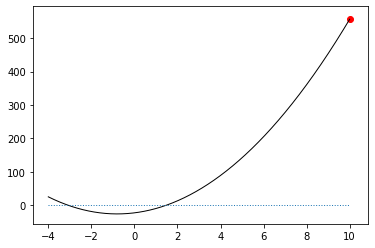

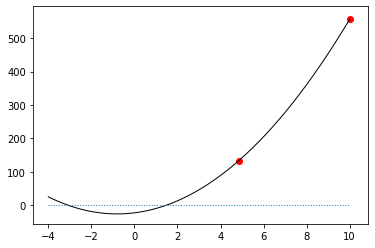

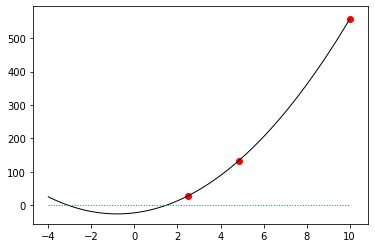

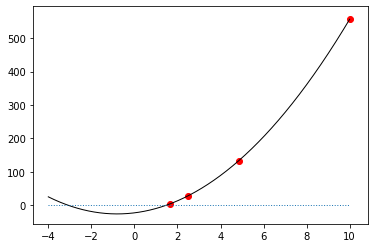

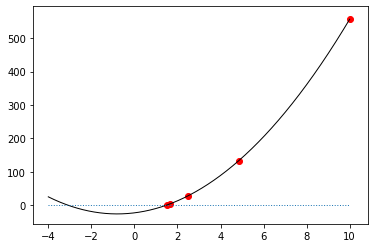

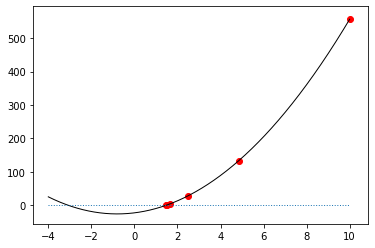

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return 5*x**2 + 8*x - 23
def dy(x):
    return 10*x + 8

xplot = np.linspace(-4,10,10000)
yplot = y(xplot)
xrange = [-4, 10]
yrange = [0, 0]

x = 10
xlist = []
ylist = []
while abs(y(x)) > 1e-8:
    xlist.append(x)
    ylist.append(y(x))
    plt.plot(xplot,yplot,'k',LineWidth = 1)
    plt.plot(xrange,yrange,':',LineWidth = 1)
    plt.scatter(xlist, ylist, color = 'r', marker = 'o')
    plt.show()
    x = x - y(x)/dy(x)

So that's a simple and efficient numerical method for root finding! It's elegant, and there isn't much complicated about it in practice!

We used basic operations (add, subtract, multiple, and divide) in an iterative loop to solve a nonlinear equation. Now, it is entertaining to write a Newton-Raphson method in a script. It's fine to do, but usually, I would advocate for taking advantage of methods available already in Python.  First, they have been optimized by mathematicians and computer scientists, and so, in general, I would expect faster and more stable performance from a Python root finding algorithm than one I have written from scratch. Second, the Newton-Raphson method is not always going to be the right choice.  It is not guaranteed to converge, and it may give you poor stability in solving certain equations.  There are many other options you might want to try, they are pretty much all built into Python packages, and they all use pretty much interchangeable syntax, which makes it easy to try a different method when the first fails. You'll find most of these root finding tools in the Scipy package, specificially in scipy.optimize. Feel free to do a deep dive on root finding algorithms in your spare time.

https://en.wikipedia.org/wiki/Root-finding_algorithms

**Scipy**

Scipy is a package that includes numerical methods and optimization routines, and it includes multiple options for root finding with univariate functions. 

https://docs.scipy.org/doc/scipy/reference/optimize.html

Don't worry too much if the documentation is overwhelming right now; it will become more clear as we go through examples.  I think in the Scipy documentation, they use the term "scalar" functions similarly to how I've been using "univariate" functions here.  What they mean is a function that produces a scalar output, not a list, array, tuple, etc.  "Scalar function" might be a better way to describe them than "univariate functions," but for our purposes, they are roughly the same - you'll use them to solve a single equation, 0 = f(x), where there is a single independent variable.

First, let's import scipy.optimize:

    import scipy.optimize as opt
    
Once we have it imported, its root finding algorithms all have a few basic syntax conventions:
   
Their implementation of "Newton-Raphson" (newton) actually includes the Newton-Raphson iteration, a secant method, and Halley's method; the choice of which it uses is determined by the inputs you give to the problem. At a minimum, it requires a function and an intial guess at the solution:

    opt.newton(function_name, initial_guess)

This version of "newton" actually uses a secant method, not a true NR iteration since we provide no information about the derivative. For this particular example, all we provide is our function handle (y) and our initial guess at the root value (0):

    opt.newton(y, 0)

The output of the specific syntax above will just give me the value of the root. Try it out and see; it should give you the result you expect based on the quadratic formula

In [15]:
import scipy.optimize as opt
opt.newton(y,0)

1.4891046284519192

If you wanted to run an identical Newton-Raphson iteration to what you wrote in the while loop, you have to supply the derivative as a function of x to newton using the fprime keyword argument. Fortunately, we already wrote a function for the derivative (dy):

    opt.newton(y, 0, fprime = dy)

In [17]:
opt.newton(y, 0, fprime = dy)

1.4891046284519194

It may sometimes be of interest to have more information about the progress made during the iterations. Usually, I like to know if the method converged or not, and by "converged" we mean did it find a value of x where y is sufficiently close to zero that it was within our tolerance. Sometimes you will notice a numerical method gives you a solution that you know to be incorrect.  When this happens, it is usualy a safe bet that the method did not converge, so you should get in the habit of looking at the convergence of the solution. You can do that by adding options. Here, we request a Newton-Raphson iteration (by providing the derivative) as well as a full output.

    opt.newton(y,0, fprime = dy, full_output = True)

We won't cover the full options available, but you have a lot of flexibility in terms of adjusting tolerance, passing extra parameters as function arguments, etc.  In general, scipy root finding algorithms can probably handle whatever you have in mind.

In [18]:
opt.newton(y,0,fprime = dy,full_output = True)

(1.4891046284519194,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 1.4891046284519194)

As mentioned above, Scipy's "newton" includes Newton-Raphson, a secant method, and Halley's method (you can read about them if you like), and I've had pretty good luck with it in solving nonlinear scalar equations. *newton* is probably a good default choice for univariate root finding. 

There are other options available that are generally based on some sort of bracketing method where you specify the endpoints of the range that you want to search for a root. These include *brentq, brenth, ridder, bisect, and toms748*. You may want to use these if *newton* fails to converge. *newton* is a relatively fast method, but it is not guaranteed to converge, whereas bracketing methods are relatively slow, but are guaranteed to converge. 

The bracketing methods are all called with the following basic syntax.  

    opt.algorithm_name(function_name, lower_limit, upper_limit)
    
For example, to use brentq, we provide the function handle (y), the lower bracket of the interval where we want to look for a root, and the upper bracket of the interval where we want to look for a root. For bracketing methods, the function value at the lower limit (f(lower)) and the function value at the upper limit f(upper) generally need to have opposite signs for a bracketing method, which I can easily determine by looking at a graph. For example, I can see that x = -2, y(-2) = -19 and at x = 2, y(2) = 13...so -2 and 2 is a good range to specify for a bracketing algorithm like brentq.  It should locate a root between x = -2 and x = 2:

    opt.brentq(y,-2,2)
    
And as above with newton, I have the option of requesting a full output using keyword arguments:

    opt.brentq(y, -2, 2, full_output = True)

In [19]:
opt.brentq(y,-2,2, full_output = True)

(1.4891046284519196,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 1.4891046284519196)

You may notice another solver called root_scalar if you look at the documentation. Its syntax is a little more complicated, but it seems to be an option that lets you change methods as you see fit by only changing the method option, initial guess, and/or brackets.  It's also a nice bridge function to the methods we will consider for multivariate functions (these are the methods we'll use to solve nonlinear systems of equations), so it's worth introducing root_scalar usage in a few simple cases.  For example, if I want to use a newton through root_scalar, I need to specify the function, the starting point, the derivative, and the method:

    opt.root_scalar(y, x0 = 0, fprime = dy, method = 'newton')
    
If I wanted to use the brentq method, I need the function, a bracket, and the method name:

    opt.root_scalar(y, bracket = [-2, 2], method = 'brentq')

And if brentq was no good, you can try toms748:

    opt.root_scalar(y, bracket = [-2, 2], method = 'toms748')
  
**Important:** As far as I can tell, there is no difference in the algorithms employed by root_scalar and the direct calls to a specific algorithm using syntax like opt.newton, opt.brentq, etc. It seems to invoke the same machinery using slightly different syntax and outputting a slightly different solution structure.  I debated whether or not to introduce it, but I thought it might be good for getting everyone familiar with specifying options using keyword arguments (bracket = [-2, 2] for example)

In [20]:
opt.root_scalar(y, x0 = 0, fprime = dy, method = 'newton')

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.4891046284519194

Now: some trouble.

The above example is really well-behaved. It is a robust 2nd order polynomial, and pretty much anything we use - graphical, quadratic, or any available numerical methods will solve it easily. Further, you can guess almost anything for your initial value of x, or provide reasonable brackets for the solver, and the algorithm will find the correct root.  This isn't always the case.  Some equations are more difficult to handle than others, and you may have to pay close attention to your initial guess or even your choice of solver.  This example is a bit contrived, but it will illustrate the point:

Consider the function:

$$g(t) = -0.74 + 0.765t + 1.1t^2 - 3.55t^3$$

When approaching a new problem that I will try to solve numerically, it is always helpful to graph it. Go ahead and do so to see if you can narrow down the range where you should look for a root.  

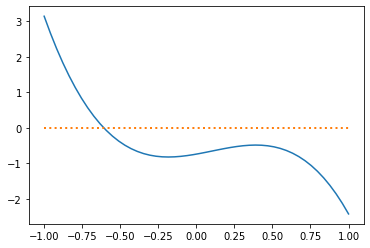

In [31]:
def g(t):
    return -0.74  + 0.765*t + 1.1*t**2 - 3.55*t**3
xrange = [-1,1]
xplot_nd = np.linspace(-1,1)
yplot_nd = g(xplot_nd)
plt.plot(xplot_nd,yplot_nd)
plt.plot(xrange,yrange,':',LineWidth = 2)

From the graph, I can see there is a root somewhere between -0.5 and -0.8.  Let's try to find it using our homebrew Newton-Raphson iteration, but we'll start with a bad initial guess on purpose:

    def g(t):
        return -0.74  + 0.765*t + 1.1*t**2 - 3.55*t**3
    def dg(t):
        return 0.765 + 2.2*t - 3*3.55*t**2
    
    t =  5/9
    while abs(g(t)) > 1e-6:
        t  = t - g(t)/dg(t)
        print(round(t,10),round(g(t),10))
 
Run it and see what happens! Remember you can use the stop button to interrup code execution if you seem to be stuck in a loop. Now try again with different initial guesses and see if you can get it to converge on the root. 

In [42]:
def dg(t):
    return 0.765 + 2.2*t - 3*3.55*t**2
t = -0.5
while abs(g(t)) > 1e-6:
    t = t - g(t)/dg(t)
    print(round(t,10),round(g(t),10))

-0.6346955796 0.1252435048
-0.609247652 0.0050312899
-0.6081366095 9.3625e-06
-0.6081345343 0.0


Ok, so now let's see if Scipy's tools fare any better. Try finding the root of g(t) using Scipy's Newton-Raphson iteration.

    opt.newton(g, 5/9, fprime = dg)

In [43]:
opt.newton(g,-0.5,fprime = dg)

-0.6081345342894493

No surprise there - it used the same algorithm we wrote in our homebrew script, so it hits the same snag.  Let's try the "newton" method with default options in Scipy:

    opt.newton(g, 5/9)

In [44]:
opt.newton(g,5/9)

-0.6081345342894502

Why does that work?  We provided *less* information to the solver? Simply because *newton* defaults to a secant method if we don't provide the derivative, and the secant method is better than an NR iteration for this particular example.  Feel free to try some of the other bracketing methods, your homebrew method with different initial guesses, and Scipy's NR iteration with different initial guesses to get a feel for how things change when you switch algorithms and initial guesses.

What's the point?  First, to introduce the idea that numerical methods for root finding are often very sensitive to initial guesses and that bad initial guesses will often prevent a numerical root finding algorithm from succeeding.  Usually, when numerical methods fail for solving algebraic equations (root finding), the first thing I do is try a different initial guess. Second, to get you used to the idea that there are many  algorithms for root-finding, and it will generally require an informed decision on your part to find the one that works best for your particular problem. 

**In summary:** when your root finding algorithm fails, it's probably a bad combination of algorithm, initial guess, and/or bracketing range. Most algorithms will work if you provide the right initial guesses or brackets. Try graphing and changing specifications first; if that doesn't work, consider using a different algorithm.

### A great place for anonymous (lambda functions)

Numerical root finding for univariate functions is a great place to get practice with writing and using lambda functions.  For example, let's say I want to solve the function below using an initial guess of x = 10:

$$e^x = x^4 + 75.457$$

First, I need to make sure I convert this expression into a form 0 = f(x):

$$0 = x^4 - e^x + 75.457$$

Now, I *could* go through the usual, long form function definition of that function that I want to set equal to zero:
    
    def k(x):
        return x**4 - np.exp(x) + 75.457 
    opt.newton(k,10)
    
But I don't necessarily need to formally assign that function handle since the function is so simple. This is a great place to use an anonymous function.  I have a few options.  I can use the lambda convention to assign the function handle:

    k = lambda x: x**4 - np.exp(x) + 75.457
    opt.newton(k, 10)
    
Or I can dispense with assigning the function handle altogether and just use the lambda function inline.

    opt.newton(lambda x: x**4 - np.exp(x) + 75.457, 10)
    
Take your pick! Whichever makes sense to you.  They all accomplish the same end result.  **Note**, in these functions, I'm using numpy's exponential, **np.exp(x)** instead of importing **math.exp**. np.exp supports element-wise operations on an array natively, whereas math.exp does not.

In [46]:
k = lambda x: x**4 - np.exp(x) + 75.457
opt.newton(k,10)

8.638269964635656

**Closing thoughts on Univariate Functions:** I know we did it here for illustration purposes, but in general, I don't advocate writing your own numerical methods. Instead, I would go to methods available in the language that I'm using. Matlab has options, as does Python. My reason for saying this is that numerical method algorithms have been written in those languages by very smart people (mathemeticians and computer scientists) that are usually better at a) numerical methods and b) coding than we are. The packages available in Python will generally run faster and more stably than anything we write on our own. Finally, you can see that writing *opt.newton(y,0)* is a lot less work than writing your own while loop.

## Problem Set ##

Find all of the roots/solutions for each of the examples below:

Remember a few helpful tips: 

1. It may be useful to graph your functions so that you can provide good inputs to the algorithm.
2. You can choose a newton method, which does not require you to bracket the solution.
3. You can choose multiple bracketing methods, and all of them require you to bound the solution.
4. I have not solved these problems yet, so it is possible that there are no roots for some of the functions.

You should be able to import any of the necessary functions (e.g., exponentials, logarithms, etc.) from either math or numpy as needed.

$$f(x) = x^2 - 6x + 9$$

3.000000005714121

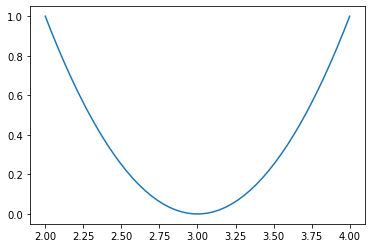

In [53]:
j = lambda x: x**2 - 6*x + 9
xplot = np.linspace(2,4)
plt.plot(xplot,j(xplot))
opt.newton(j, 4)

$$f(x) = x - \cos(x)$$

0.7390851332151608

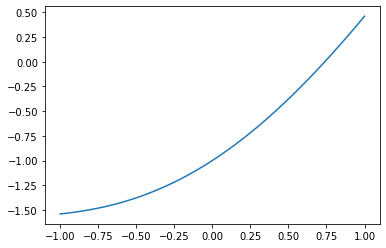

In [64]:
def h(x):
    return x - np.cos(x)
xplot = np.linspace(-1,1)
plt.plot(xplot,h(xplot))
opt.newton(h,1)

$$f(x) = e^xln(x^2) - x\cos(x)$$

-0.6236118358017191

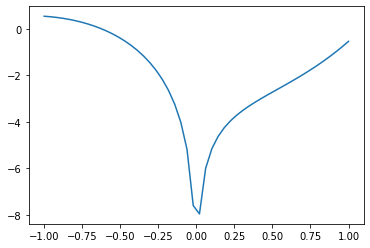

In [70]:
r = lambda x: np.exp(x)*np.log(x**2) - x*np.cos(x)
xplot = np.linspace(-1,1)
plt.plot(xplot,r(xplot))
opt.newton(r,-.5)

$$e^x - 25x + 7 = x^3 - 2x - 2$$

0.4557700948661994

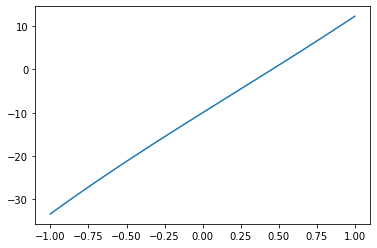

In [75]:
u = lambda x: x**3 + 23*x - 9 - np.exp(x)
xplot = np.linspace(-1,1)
plt.plot(xplot,u(xplot))
opt.newton(u,0)

$$\tanh(x) - 5 = \sinh(x) + 15x^2 + 23$$

-7.452519642256424


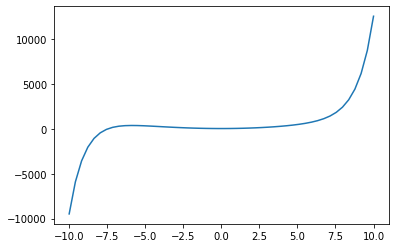

In [90]:
u = lambda x: np.sinh(x)+15*x**2+28-np.tanh(x)
xplot = np.linspace(-10,10)
plt.plot(xplot,u(xplot))
print(opt.newton(u,-7.5))

The saturation pressure (vapor pressure) of n-octane is given in mmHg as by the following Antoine Equation:

$$P^{sat} = 10^\left(7.14462 - \frac{1498.96}{(T + 225.87)}\right)$$

According to the MSDS for n-octane, the odor threshold is 0.114 mmHg.  You work with it frequently, and you want to store it at a temperature where the vapor pressure is below the odor threshold.  Calculate the temperature where you would need to store your sample of n-octane such that you can no longer smell it.

n-octane needs to be stored at -40.53 degrees C or below


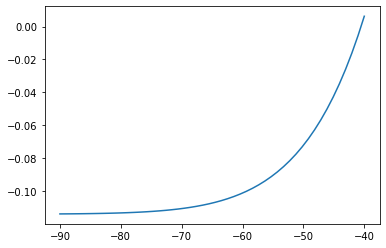

In [107]:
psat_odor = lambda x: 10**(7.14462-(1498.96)/(x+225.87)) - 0.114
xplot = (np.linspace(-90,-40))
plt.plot(xplot,psat_odor(xplot))
opt.newton(psat_odor,-45)
print('n-octane needs to be stored at -40.53 degrees C or below')

In Assignment 3, we introduced the idea of an equilibrium constant (K).  Briefly, we can calculate an equilibrium constant for any reaction i (K$_i$) provided that we know the enthalpy change of reaction ($\Delta$H) and the entropy change of reaction ($\Delta$S) at a given reaction temperature:

$$\Delta G_i = \Delta H_i + T\Delta S_i$$

$$ K_i = e^\left(\frac{-\Delta G_i}{RT}\right)$$

Let's say we have a reaction, ethylene dimerization to make 1-butene.  It has $\Delta H = -45.7$ kJ mol$^{-1}$ and $\Delta S = -150$ J mol$^{-1}$ K$^{-1}$. 

If we know the equilibrium constant, we can easily calculate the mole fraction of 1-butene in the reactor at equilibrium using the following equation:

$$K = \frac{y_B}{\left(1-y_B\right)^2} \cdot \frac{P_0}{P}$$

Here, y$_B$ is the mole fraction of 1-butene in the reactor, K is the equilibrium constant for ethylene dimerization, and P$_0$ is a reference state pressure of $1.01325 \times 10^5$ Pa. 

If we operate the reactor at 573K and 15 atm, what is the mole fraction of 1-butene at chemical equilibrium? 

In [132]:
#xplot = np.linspace(-1,1)
#plt.plot(xplot,K1(xplot))
R = 0.008314 #kJ/mol*K
T = 573 #K
yb = -20
def K(T):
    return np.exp(-(-45.7 - T*-0.150)/(R*T))
def Y(c):
    return (c/((1-c)**2))*(101325/1519875)
while abs(K(yb)-Y(yb)) > 1e-8:
    yb = yb + .0001
print(yb)
    

-3.3272610605291145e-11
0.0002141313667114225 -2.2181740402051334e-12


For the ethylene dimerization above, solve for the equilibrium mole fraction of butene at every (integer) temperature between 300K and 1000K.

1. Plot your result
2. At what temperature does the production of butene become unfavorable (i.e., for what temperature range is y$_B$ < 0.5)

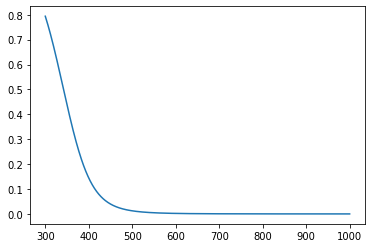

In [157]:
R = 0.008314 #kJ/mol*K
T = 300 #K
yb = []
count = 1
def K(T):
    return np.exp(-(-45.7 - T*-0.150)/(R*T))
while T < 1001:
    def Y(c):
        return (c/((1-c)**2))*(101325/1519875) - K(T)
    T = T + 1
    yb.append(opt.newton(Y,0.9))
xplot = np.linspace(300,1000,num = 701)
plt.plot(xplot,yb)

Repeat the calculation above for equilibrium butene mole fractions at all integer temperatures from 300K to 1000K AND at all integer pressures between 1 and 100 atm.

1. Graph your answer using a 3D or contour plot.

In [ ]:
R = 0.008314 #kJ/mol*K
T = 300 #K
yb = [[]]
count = 0
P = 1
def K(T):
    return np.exp(-(-45.7 - T*-0.150)/(R*T))
while T < 1001:
    while P < 101:
        def Y(c):
            return (c/((1-c)**2))*(101325/(P*101325)) - K(T)
        T = T + 1
        yb[count].append(opt.newton(Y,0.9))
    count = count + 1
    
